<a href="https://colab.research.google.com/github/uvads6050/DS6050---24F/blob/main/M2_6_Tutorial_neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial 2.6 – Introduction to Artificial Neural Networks with Keras

This code tutorial provides hands-on experience on how to implement neural networks using the popular Keras API. It is a beautifully designed and simple high-level API for building, training, evaluating, and running neural networks. Despite its simplicity, Keras is expressive and flexible enough for you to build a wide variety of neural network architectures, which should be sufficient for most of your use cases.  

# Setup

Let's import a required modules

In [1]:
import sklearn
import keras
import tensorflow as tf
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

ModuleNotFoundError: No module named 'tensorflow'

# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.
Max_iter is similar to "epoch" in Deep learning framework while tol is similar to training / validation loss used for early stopping.

In [2]:
#@title Default title text
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html


In [134]:
# View first five examples. Out data has 2-features so we have 2 x 5 array


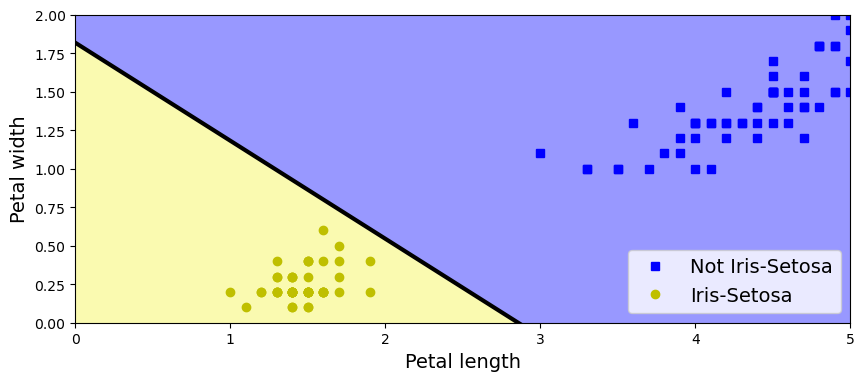

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

# save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


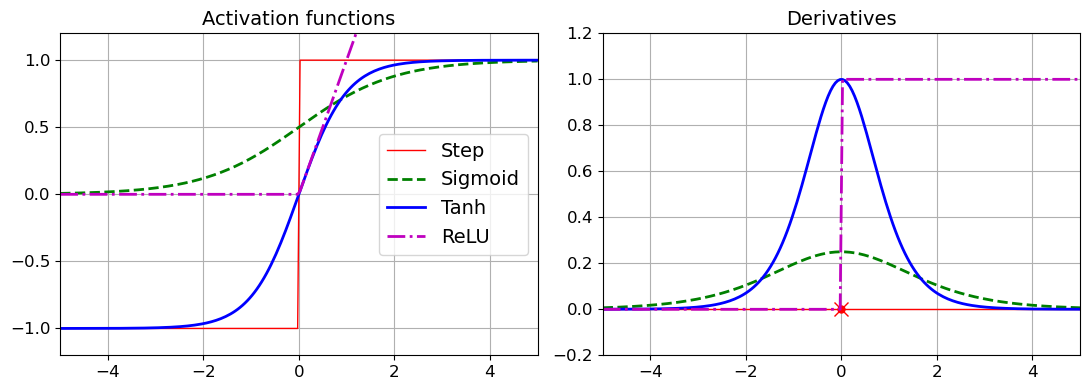

In [12]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [13]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

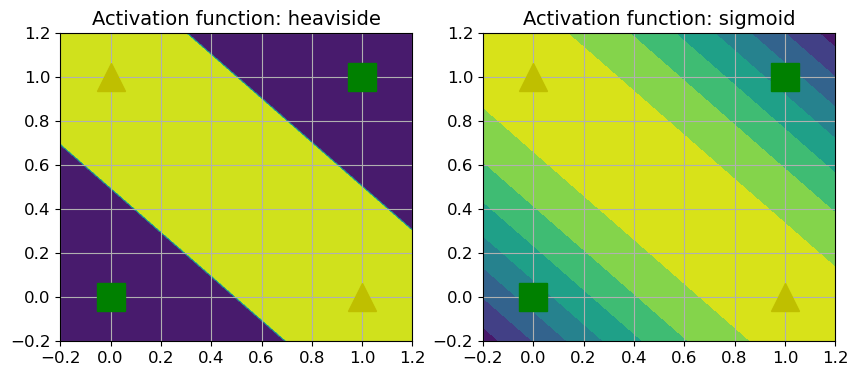

In [14]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [133]:
# print tensorflow version
tf.__version__

In [132]:
# print keras version
keras.__version__

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [7]:
# Load dataset from the keras dataset api

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [131]:
# Get shape for the full dataset


Each pixel intensity is represented as a byte (0 to 255):

In [130]:
# print datatype for each pixel in the image


You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

In [129]:
# Plot an image


Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [128]:
# Split data into train and validation set and normalize


The labels are the class IDs (represented as uint8), from 0 to 9:

Here are the corresponding class names:

In [21]:
# Define names of each categories / classes in the dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [126]:
# View label for any example image


The validation set contains 5,000 images, and the test set contains 10,000 images:

In [125]:
# print shape of the training set


In [124]:
# print shape of the test set


Let's take a look at a sample of the images in the dataset:

In [123]:
# plot some of the images 


# Model
Time to build our model using the Keras API

In [8]:
# Build a 3 - layer neural network with fully connected


In [122]:
# Print the model


In [121]:
# Print the layers


In [30]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
# Alternatively, we can wrap all the layers in the Sequential API


In [118]:
# We can peep into any layer in the model
hidden1 = model.layers[1]
hidden1.name

In [116]:
# Index into the layers and examine the weights and bias parameters


# Explore dimension of weights for the first layer


### Configure Model For Training

In [63]:
# https://keras.io/api/models/model_training_apis/#:~:text=%5Bsource%5D-,compile%20method,-Model.compile

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Training

In [115]:
# Call the fit method to train the model 
# https://keras.io/api/models/model_training_apis/#:~:text=%5Bsource%5D-,fit%20method,-Model.fit
# Save the training logs to history - training loss, training accuracy, validation loss, validation accuracy'


In [114]:
# History parameters
history.params

In [113]:
print(history.epoch)

In [112]:
# training history is saved as a dictionary of loss, accuracy for training and validation sets 
history.history.keys()

In [111]:
# Plot training logs
import pandas as pd



In [110]:
# Evaluate the model on a new test set -- Inference


In [109]:
# Use the model to predict on a new sample data points from the test set


In [108]:
# Print predicted labels


In [9]:
# Print class names of the predicted labels


In [77]:
y_new = y_test[20]
y_new

2

In [10]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [83]:
# Load the California housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Standardize using standard scaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [64]:
np.random.seed(42)
tf.random.set_seed(42)

In [106]:
# Train  2-layer Multi-layer Perceptron model for Regression


In [105]:
# Plot the training history
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [104]:
# Evaluate the model on new test set

# Select 3 examples to predict on


# Predict on new test set



# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

- https://d2l.ai/chapter_convolutional-modern/googlenet.html
- https://arxiv.org/pdf/1409.4842

In [70]:
np.random.seed(42)
tf.random.set_seed(42)

In [88]:
# Build a 3 - layer network using the keras Model Module


In [103]:
# print model architecture


In [102]:
# Configure and training the model


# Train the model


# Evaluate on new test set


# Predict on new example



What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [74]:
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
# Create a different architecture with different input configurations


In [12]:
# Configure the model for training


# Split dataset into training and validation


# Training


# Evaluate on new test set

# Predict on new examples


Adding an auxiliary output for regularization:

In [77]:
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
# Create a new model with an auxiliary output for regularization


In [79]:
# Configure the model for training and add loss penalty for for imbalance class ditribution - 
""" https://medium.com/@zergtant/use-weighted-loss-function-to-solve-imbalanced-data-classification-problems-749237f38b75#:~:text=A%20weighted%20loss%20function%20is%20a%20modification%20of,increasing%20cost%20of%20mis%20classification%20of%20that%20class."""




In [93]:
# Train model and save log to history


In [94]:
# Evaluate model on test set


# The subclassing API

In [82]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [95]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

In [84]:
model = WideAndDeepModel(30, activation="relu")

# Saving and Restoring

In [85]:
np.random.seed(42)
tf.random.set_seed(42)

In [86]:
# Create a model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [96]:
# # Train the model
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

In [88]:
# Save the entire model
model.save("my_keras_model.h5")

In [89]:
# Load the full model
model = keras.models.load_model("my_keras_model.h5")

In [97]:
model.predict(X_new)

In [91]:
# Save model weights
model.save_weights("my_keras_weights.ckpt")

In [92]:
# Reload the model weight from drive
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [93]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [94]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [98]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

In [99]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

In [97]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [100]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

# TensorBoard

# Hyperparameter Tuning